# Poisson Regression (PoissonReg) Example

This is a SIMPLE sample implementation of Poisson Regression using the `turtles` `PoissonReg` class and various supporting functions.

The `PoissonReg` class implements Poisson Regression using Maximum Likelihood Estimation (MLE) for parameter estimation.

This demo (kind-of) replicates this Scikit Learn example: https://scikit-learn.org/stable/auto_examples/linear_model/plot_poisson_regression_non_normal_loss.html#sphx-glr-auto-examples-linear-model-plot-poisson-regression-non-normal-loss-py

In [1]:
import statsmodels.api as sm
from sklearn.datasets import fetch_openml

from turtles.stats.glms import PoissonReg
from turtles.preprocess import one_hot_encode

In [2]:
# get insurance claims data
df = fetch_openml(data_id=41214, as_frame=True).frame

# shorten dataset
df = df.iloc[:5000]

print(df.shape)
df.head(10)

(5000, 12)


,IDpol,ClaimNb,Exposure,Area,VehPower,VehAge,DrivAge,BonusMalus,VehBrand,VehGas,Density,Region
0,1.0,1,0.10,D,5,0,55,50,B12,'Regular',1217,R82
1,3.0,1,0.77,D,5,0,55,50,B12,'Regular',1217,R82
2,5.0,1,0.75,B,6,2,52,50,B12,'Diesel',54,R22
3,10.0,1,0.09,B,7,0,46,50,B12,'Diesel',76,R72
4,11.0,1,0.84,B,7,0,46,50,B12,'Diesel',76,R72
5,13.0,1,0.52,E,6,2,38,50,B12,'Regular',3003,R31
6,15.0,1,0.45,E,6,2,38,50,B12,'Regular',3003,R31
7,17.0,1,0.27,C,7,0,33,68,B12,'Diesel',137,R91
8,18.0,1,0.71,C,7,0,33,68,B12,'Diesel',137,R91
9,21.0,1,0.15,B,7,0,41,50,B12,'Diesel',60,R52


<Axes: >

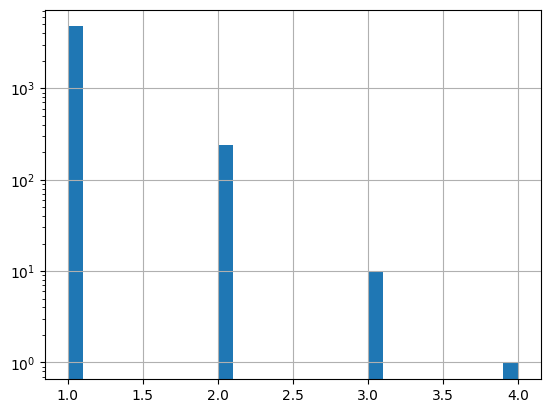

In [3]:
# approximately poisson???
df["ClaimNb"].hist(bins=30, log=True)

In [4]:
# in this demo, we'll just use some of the categorical features
df = df[["ClaimNb", "Exposure", "Area", "VehBrand"]].copy()
df.shape

(5000, 4)

In [5]:
# encode all categorical variables
df_enc = one_hot_encode(df, ["Area", "VehBrand"])
print(df_enc.shape)
df_enc.head()

(5000, 17)


,ClaimNb,Exposure,Area_B,Area_C,Area_D,Area_E,Area_F,VehBrand_B10,VehBrand_B11,VehBrand_B12,VehBrand_B13,VehBrand_B14,VehBrand_B2,VehBrand_B3,VehBrand_B4,VehBrand_B5,VehBrand_B6
0,1,0.10,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
1,1,0.77,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0.75,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,1,0.09,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0.84,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [6]:
# separate X and y
X = df_enc.drop(columns=["ClaimNb"])
y = df_enc["ClaimNb"]

print(X.shape)
print(y.shape)

(5000, 16)
(5000,)


In [7]:
# extract exposure
exposure = X["Exposure"]
X = X.drop(columns=["Exposure"])

print(X.shape)
print(exposure.shape)

(5000, 15)
(5000,)


In [8]:
# convert to numpy
X = X.to_numpy()
exposure = exposure.to_numpy().reshape(exposure.shape[0], 1)
y = y.to_numpy().reshape(y.shape[0], 1)

print(X.shape)
print(exposure.shape)
print(y.shape)

(5000, 15)
(5000, 1)
(5000, 1)


In [9]:
# fit model using newton's method
n_model = PoissonReg(
    method="newton",
    learning_rate=0.01
)
n_model.fit(
    X, 
    y, 
    exposure
)

print("Iterations:", n_model.iterations)
n_model.summary()

Iterations: 877


,Variable,Coefficient,Std Error,z-statistic,p-value,[0.025,0.075]
0,Intercept,1.1053,0.0920,12.0109,0.0000,0.9249,1.2857
1,x0,0.0393,0.0630,0.6245,0.5323,-0.0841,0.1627
2,x1,0.0195,0.0521,0.3739,0.7085,-0.0826,0.1216
3,x2,0.0397,0.0520,0.7629,0.4455,-0.0623,0.1417
4,x3,0.0378,0.0518,0.7285,0.4663,-0.0638,0.1393
5,x4,0.0483,0.0715,0.6751,0.4996,-0.0918,0.1884
6,x5,-0.3388,0.3124,-1.0845,0.2782,-0.9511,0.2735
7,x6,0.2980,0.3000,0.9931,0.3206,-0.2901,0.8861
8,x7,0.1336,0.0828,1.6144,0.1064,-0.0286,0.2958
9,x8,0.2247,0.1878,1.1961,0.2317,-0.1435,0.5928


In [10]:
# fit model using l-bfgs
l_model = PoissonReg(method="lbfgs")
l_model.fit(
    X,
    y,
    exposure
)

print("Iterations:", l_model.iterations)
l_model.summary()

Iterations: 48


,Variable,Coefficient,Std Error,z-statistic,p-value,[0.025,0.075]
0,Intercept,1.1056,0.0920,12.0168,0.0000,0.9253,1.2860
1,x0,0.0393,0.0630,0.6249,0.5320,-0.0841,0.1628
2,x1,0.0196,0.0521,0.3762,0.7067,-0.0825,0.1217
3,x2,0.0398,0.0520,0.7649,0.4443,-0.0622,0.1418
4,x3,0.0378,0.0518,0.7298,0.4655,-0.0638,0.1394
5,x4,0.0484,0.0715,0.6776,0.4980,-0.0917,0.1885
6,x5,-0.3402,0.3125,-1.0884,0.2764,-0.9527,0.2724
7,x6,0.2968,0.3001,0.9889,0.3227,-0.2915,0.8851
8,x7,0.1333,0.0827,1.6108,0.1072,-0.0289,0.2954
9,x8,0.2244,0.1878,1.1950,0.2321,-0.1437,0.5925


## Compare to Statsmodels

Let's compare the `turtles` implementation to `statsmodels`.

In [11]:
import statsmodels.api as sm

X_sm = sm.add_constant(X)
poisson_model = sm.GLM(
    y.flatten(), 
    X_sm, 
    exposure=exposure.flatten(),
    family=sm.families.Poisson()
).fit()

print(poisson_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 5000
Model:                            GLM   Df Residuals:                     4984
Model Family:                 Poisson   Df Model:                           15
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7952.2
Date:                Sat, 04 Oct 2025   Deviance:                       5746.5
Time:                        12:42:37   Pearson chi2:                 1.74e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.002768
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1054      0.092     12.013      0.0